In [15]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

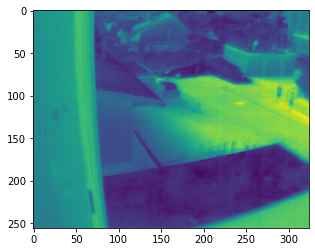

In [16]:
image_path = 'dataset/asl_eth_flir/flir_17_Sept_2013/Sempach-11/8bit/1.png'

img8 = mpimg.imread(image_path)
plt.imshow(img8)

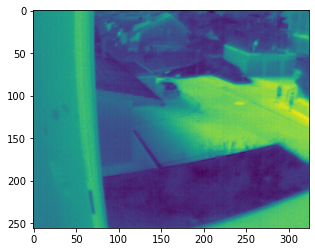

In [17]:
image_path = 'dataset/asl_eth_flir/flir_17_Sept_2013/Sempach-11/16bit/1.png'

img16 = mpimg.imread(image_path)
plt.imshow(img16)

In [21]:
annotation_path = 'dataset/asl_eth_flir/flir_17_Sept_2013/Sempach-11/annotation/Sempach-11.txt'

In [54]:
from collections import defaultdict


class Annotation:
    def __init__(self, target, start, end, pos):
        self.target = target
        self.start = start
        self.end = end
        self.pos = pos


def extract_annotations(path):
    with open(path) as file:
        lines = [line.rstrip() for line in file]
        lines = [l for l in lines if len(l) > 0]

    head = lines[:3]
    text_annotations = [l for l in lines[3:] if len(l) > 0]
    annotations = []

    for i in range(0, len(text_annotations), 6):
        metadata = text_annotations[i + 1]
        metadata = metadata.split(' ')
        label = metadata[0].split('=')[1]
        start = metadata[1].split('=')[1]
        end = metadata[2].split('=')[1]

        pos = text_annotations[i + 2].split('=')[1]
        pos = pos[1: -2]

        pos = [tuple(p.strip().split(' ')) for p in pos.split(';')]
        pos = [tuple(map(float, p)) for p in pos if len(p) == 4]

        annotations.append(Annotation(target=label, start=start, end=end, pos=pos))

    return annotations

annotations = extract_annotations(annotation_path)

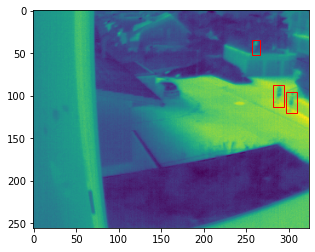

In [58]:
from matplotlib import patches

fig,ax = plt.subplots(1)

# Display the image
ax.imshow(img16)

# Create a Rectangle patch
# for e in rect_coordinates:
(x, y, w, h) = annotations[0].pos[0]
rect = patches.Rectangle((x,y),w,h,linewidth=1,edgecolor='r',facecolor='none')
ax.add_patch(rect)
(x, y, w, h) = annotations[1].pos[0]
rect = patches.Rectangle((x,y),w,h,linewidth=1,edgecolor='r',facecolor='none')
ax.add_patch(rect)
(x, y, w, h) = annotations[2].pos[0]
rect = patches.Rectangle((x,y),w,h,linewidth=1,edgecolor='r',facecolor='none')
ax.add_patch(rect)